# =======================================================================================================
# Exercises (7) START
# =======================================================================================================

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

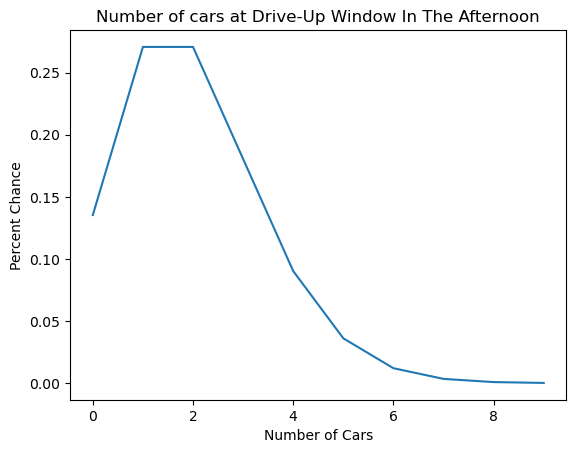

In [8]:
x = np.arange(0,10)
y = [sts.poisson(2).pmf(i) for i in x]
plt.title('Number of cars at Drive-Up Window In The Afternoon')
plt.xlabel('Number of Cars')
plt.ylabel('Percent Chance')
plt.plot(x, y)
plt.show()

In [9]:
carsatwindow = sts.poisson(2)

##### 1a. What is the probability that no cars drive up in the noon hour?

In [10]:
carsatwindow.pmf(0)

0.1353352832366127

##### 1b. What is the probability that 3 or more cars come through the drive through?

In [11]:
carsatwindow.sf(2)

0.32332358381693654

##### 1c. How likely is it that the drive through gets at least 1 car?

In [12]:
carsatwindow.sf(0)

0.8646647167633873

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [13]:
# Mean: 3.0
# SD: .3

##### 2a. What grade point average is required to be in the top 5% of the graduating class?

In [29]:
sts.norm(3, .3).isf(.05)

3.4934560880854417

##### 2b. What GPA constitutes the bottom 15% of the class?

In [30]:
sts.norm(3, .3).ppf(.15)

2.689069983151863

##### 2c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [31]:
sts.norm(3, .3).ppf(0.3)

2.842679846187588

In [ ]:
# In range

##### 2d. If I have a GPA of 3.5, what percentile am I in?

In [34]:
sts.norm(3, .3).pdf(3.5)

0.3315904626424956

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [ ]:
# Click Chance: .02
# Trials: 4326
# Clicks: 97

In [35]:
sts.binom(4326, .02).sf(96)

0.13975823631416445

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

In [ ]:
# Trials: 100
# Chance correct: .01

##### 4a. What is the probability that at least one of your first 60 answers is correct?

In [36]:
sts.binom(60, .01).sf(0)

0.45284335760923855

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [ ]:
# Clean Chance Per Visitor: .03
# Visit Chance Per Cohort: .9
# Total Cohorts: 3
# Total Students Per Cohort: 22

In [59]:
# At least one person cleans (45.6%)
sts.binom((sts.binom(22, .9).mean().round()), .03).sf(0)

0.4562056570732528

In [60]:
oneclean = sts.binom((sts.binom(22, .9).mean().round()), .03).sf(0)

In [62]:
# 96.2% no-clean for 2 days
sts.binom(7, oneclean).cdf(5)

0.9615713173365934

In [61]:
# .4% clean ALL WEEK
sts.binom(7, oneclean).pmf(7)

0.004112677587320353

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [ ]:
# Avg in line: 15
# SD of line: 3
# Time/Order: 2min
# Time/Receive: 10min
# TOTAL TIME: 12min
# Time alotted: 60min
#######################################
# Mean: 30min
# SD: 6min
# Must order within 33min

In [50]:
sts.norm(30, 6).cdf(33)

0.6914624612740131

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [2]:
import env

In [8]:
employees = pd.read_sql(
            '''
            SELECT
                salaries.emp_no,
                salaries.salary,
                salaries.to_date
            FROM employees
            JOIN salaries USING(emp_no)
            ''', env.get_db_url("employees"))

In [9]:
employees.head()

,emp_no,salary,to_date
0,10001,60117,1987-06-26
1,10001,62102,1988-06-25
2,10001,66074,1989-06-25
3,10001,66596,1990-06-25
4,10001,66961,1991-06-25


In [21]:
employees = employees[employees.to_date.astype(str).str.startswith('9999')].drop(columns=['to_date'])

In [29]:
empmean = round(employees.salary.mean())

In [33]:
empsd = round(employees.salary.std())

In [35]:
empsalarystat = sts.norm(empmean, empsd)

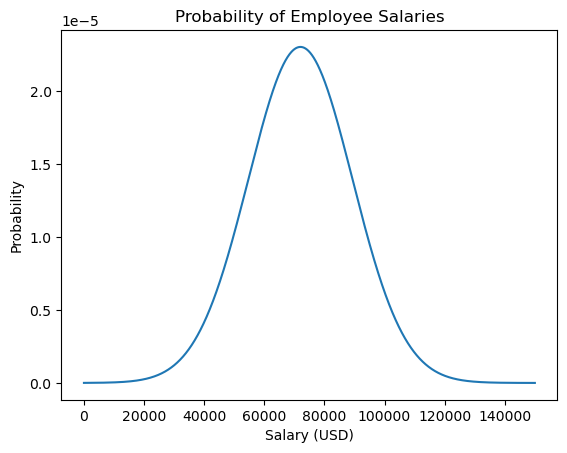

In [45]:
x = np.arange(0, 150000)
y = [empsalarystat.pdf(i) for i in x]
plt.plot(x, y)
plt.title('Probability of Employee Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Probability')
plt.show()

##### 7a. What percent of employees earn less than 60,000?

In [36]:
empsalarystat.cdf(59999)

0.243843640501544

##### 7b. What percent of employees earn more than 95,000?

In [37]:
empsalarystat.sf(95000)

0.09208599994106093

##### 7c. What percent of employees earn between 65,000 and 80,000?

In [41]:
empsalarystat.sf(65000) - empsalarystat.sf(79999)

0.3350396444362912

##### 7d. What do the top 5% of employees make?

In [42]:
empsalarystat.isf(.05)

100484.41628253

##### HINT: If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:

# =======================================================================================================
# Exercises (7) END
# =======================================================================================================